In [13]:
#importando pacotes 
from tkinter import Tk, Label, Button, Entry
from tkinter.filedialog import askopenfilename, asksaveasfile
import geopandas
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import fiona
from shapely.geometry import Point, LineString

from scipy.interpolate import interp1d

import numpy as np

fiona.supported_drivers['KML'] = 'rw'

In [3]:
srtm = rasterio.open('s31_w055_3arc_v2.tif')

In [4]:
ponto_informado = Point((-54.1869, -30.8767))

In [5]:
cota_tal = list(srtm.sample([(ponto_informado.x, ponto_informado.y)]))

In [6]:
print(cota_tal[0][0])

235


In [7]:
tracado = geopandas.read_file('tracado_do_rio.kml', driver='KML')
tracado = tracado.to_crs(epsg=31982)

In [8]:
tracado.crs

<Projected CRS: EPSG:31982>
Name: SIRGAS 2000 / UTM zone 22S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 54°W and 48°W, northern and southern hemispheres, onshore and offshore. In remainder of South America - between 54°W and 48°W, southern hemisphere, onshore and offshore.
- bounds: (-54.0, -54.18, -47.99, 7.04)
Coordinate Operation:
- name: UTM zone 22S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

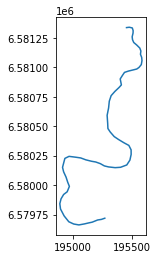

In [9]:
tracado.plot()

In [10]:
n = 20
distances = np.linspace(0, tracado.length, n)
points = [tracado.interpolate(distance) for distance in distances]

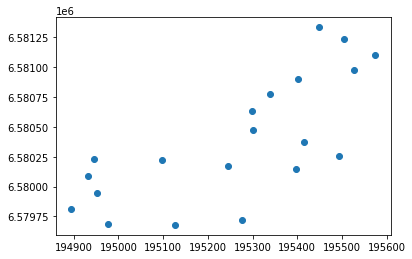

In [11]:
x = []
y = []
for i in points:
    x.append(i.x[0])
    y.append(i.y[0])
plt.scatter(x, y)

In [12]:
LineString(points)

AssertionError: 